# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#建立模型

In [29]:
model_new = Sequential()

model_new.add(Dense(units = 256,input_dim = 784, activation = 'relu', kernel_initializer = 'normal'))
#model_new.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'normal'))
model_new.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'normal'))
model_new.add(Dense(units = 10, activation = 'softmax', kernel_initializer = 'normal'))

model_new.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [30]:
model_new.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [31]:
train_history =model_new.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.2815 - accuracy: 0.9186 - val_loss: 0.1344 - val_accuracy: 0.9609
Epoch 2/10
48000/48000 [==============================] - 6s 118us/step - loss: 0.1085 - accuracy: 0.9673 - val_loss: 0.1025 - val_accuracy: 0.9701
Epoch 3/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.1006 - val_accuracy: 0.9694
Epoch 4/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0509 - accuracy: 0.9835 - val_loss: 0.0929 - val_accuracy: 0.9732
Epoch 5/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0908 - val_accuracy: 0.9762
Epoch 6/10
48000/48000 [==============================] - 6s 122us/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0992 - val_accuracy: 0.9748
Epoch 7/10
48000/48000 [==============================] - 6s 1

# 以圖形顯示訓練過程

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

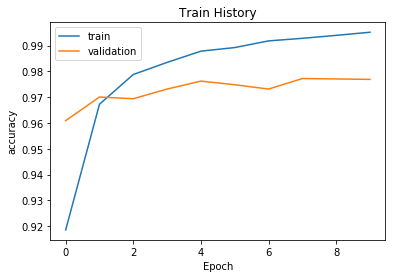

In [32]:
#show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'accuracy','val_accuracy')

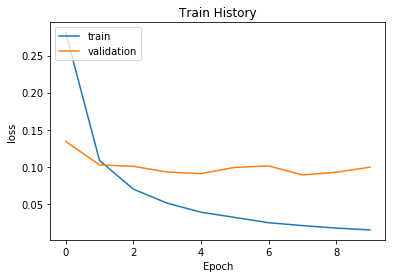

In [33]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [34]:
scores = model_new.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
### 無明顯差異, 準確率稍微提升

10000/10000 [==============================] - 0s 27us/step

accuracy= 0.9764000177383423
